# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mattru
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | dalvik
Processing Record 5 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | mikropolis
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | concordia
Processing Record 16 of Set 1 | peleduy
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | brooks
Processing Record 20 of Set 1 | teguise
Processing Record 21 of Set 1 | kahului
Processing Record 22 of Set 1 | kaeo
Pr

Processing Record 39 of Set 4 | la ronge
Processing Record 40 of Set 4 | saint anthony
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | chingola
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | nadym
Processing Record 46 of Set 4 | cradock
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | la asuncion
Processing Record 0 of Set 5 | pendleton
Processing Record 1 of Set 5 | churapcha
Processing Record 2 of Set 5 | sakmara
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | ponta delgada
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | socastee
Processing Record 8 of Set 5 | lucea
Processing Record 9 of Set 5 | darab
Processing Record 10 of Set 5 | flinders
Processing Record 11 of Set 5 | bereznik
Processing Record 12 of Set 5 | esperance
Processing Record 13 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | praia
Processing Record 29 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 30 of Set 8 | xiamen
Processing Record 31 of Set 8 | lodwar
Processing Record 32 of Set 8 | dolores
Processing Record 33 of Set 8 | sao mateus do maranhao
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | san policarpo
Processing Record 37 of Set 8 | srednekolymsk
Processing Record 38 of Set 8 | joshimath
Processing Record 39 of Set 8 | kuminskiy
Processing Record 40 of Set 8 | arvika
Processing Record 41 of Set 8 | buin
Processing Record 42 of Set 8 | nishihara
Processing Record 43 of Set 8 | kambove
Processing Record 44 of Set 8 | marv dasht
City not found. Skipping...
Processing Record 45 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 46 of Set 8 | galle
Processing Record 47 of Set 8 | nanzhou
Processing Record 48 of Set 8 | 

Processing Record 12 of Set 12 | abancay
Processing Record 13 of Set 12 | portalegre
Processing Record 14 of Set 12 | bandundu
Processing Record 15 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 12 | matata
Processing Record 17 of Set 12 | kembe
Processing Record 18 of Set 12 | zhezkazgan
Processing Record 19 of Set 12 | huesca
Processing Record 20 of Set 12 | loknya
Processing Record 21 of Set 12 | pailon
Processing Record 22 of Set 12 | solok
Processing Record 23 of Set 12 | vila franca do campo
Processing Record 24 of Set 12 | yarmouth
Processing Record 25 of Set 12 | palitana
Processing Record 26 of Set 12 | marystown
Processing Record 27 of Set 12 | atlantic city
Processing Record 28 of Set 12 | ballina
Processing Record 29 of Set 12 | cap-aux-meules
Processing Record 30 of Set 12 | manjacaze
Processing Record 31 of Set 12 | yangambi
Processing Record 32 of Set 12 | aksarka
Processing Record 33 of Set 12 | maria la baja
Processing Record 34 of Set 

In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.58,84,68,8.58,PF,1671536284
1,mattru,7.6244,-11.8332,32.86,46,64,0.97,SL,1671536284
2,souillac,-20.5167,57.5167,29.21,58,20,6.17,MU,1671536285
3,dalvik,65.9702,-18.5286,-1.04,92,100,17.11,IS,1671536285
4,ushuaia,-54.8000,-68.3000,9.81,76,0,3.09,AR,1671535908


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.58,84,68,8.58,PF,1671536284
1,mattru,7.6244,-11.8332,32.86,46,64,0.97,SL,1671536284
2,souillac,-20.5167,57.5167,29.21,58,20,6.17,MU,1671536285
3,dalvik,65.9702,-18.5286,-1.04,92,100,17.11,IS,1671536285
4,ushuaia,-54.8000,-68.3000,9.81,76,0,3.09,AR,1671535908


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

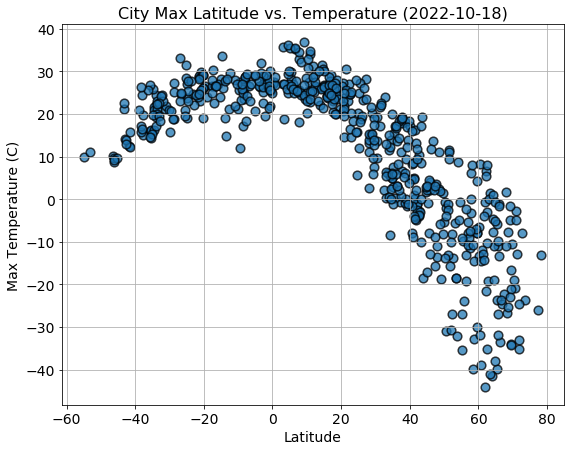

In [66]:
# Create the figure and set the size
plt.figure(figsize=(9,7))

# Create the scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, edgecolors='black', s=75, linewidths=1.5)

# Add a grid
plt.grid()

# Set the title and labels
plt.title("City Max Latitude vs. Temperature (2022-10-18)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)

plt.tick_params(labelsize=14)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

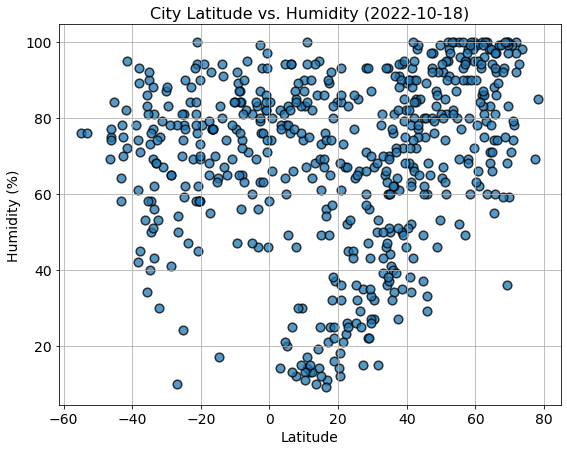

In [67]:
# Create the figure and set the size
plt.figure(figsize=(9,7))

# Create the scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.75, edgecolors='black', s=75, linewidths=1.5)

# Add a grid
plt.grid()

# Set the title and labels
plt.title("City Latitude vs. Humidity (2022-10-18)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)

plt.tick_params(labelsize=14)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

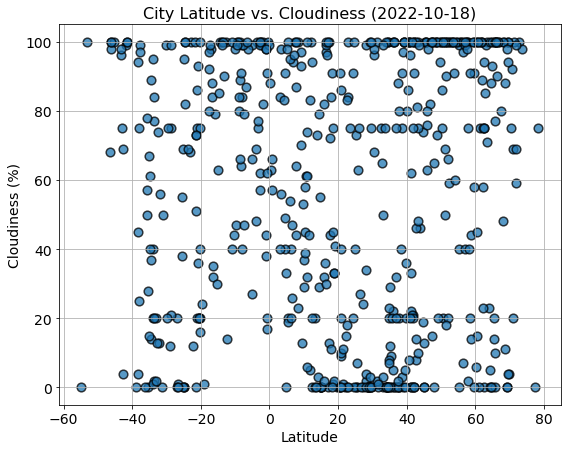

In [68]:
# Create the figure and set the size
plt.figure(figsize=(9,7))

# Create the scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.75, edgecolors='black', s=75, linewidths=1.5)

# Add a grid
plt.grid()

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (2022-10-18)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)

plt.tick_params(labelsize=14)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

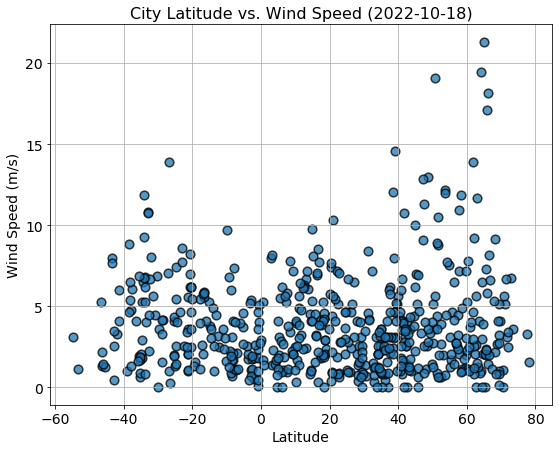

In [69]:
# Create the figure and set the size
plt.figure(figsize=(9,7))

# Create the scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, edgecolors='black', s=75, linewidths=1.5)

# Add a grid
plt.grid()

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (2022-10-18)", fontsize=16)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)

plt.tick_params(labelsize=14)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots

def regression_plot(df, x_column, y_column, x_label, y_label):
    # Convert to floats and store x and y values
    x_values = df[x_column].astype("float")
    y_values = df[y_column].astype("float")

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create the figure and set the size
    plt.figure(figsize=(8,6))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")

    # Annotate the plot with the line equation
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    plt.annotate(line_eq, (x_min + 0.1*(x_max-x_min), y_min + 0.2*(y_max-y_min)), fontsize=15, color="red", ha="left", va="bottom")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mattru,7.6244,-11.8332,32.86,46,64,0.97,SL,1671536284
3,dalvik,65.9702,-18.5286,-1.04,92,100,17.11,IS,1671536285
5,hamilton,39.1834,-84.5333,-1.53,79,100,3.09,US,1671535756
7,mikropolis,41.1935,23.8157,5.06,52,33,0.84,GR,1671536287
12,lavrentiya,65.5833,-171.0000,-10.97,81,10,2.39,RU,1671536289


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.58,84,68,8.58,PF,1671536284
2,souillac,-20.5167,57.5167,29.21,58,20,6.17,MU,1671536285
4,ushuaia,-54.8000,-68.3000,9.81,76,0,3.09,AR,1671535908
6,hobart,-42.8794,147.3294,14.03,78,75,2.57,AU,1671536178
8,puerto ayora,-0.7393,-90.3518,21.97,97,17,2.37,EC,1671536287


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7466686526750859


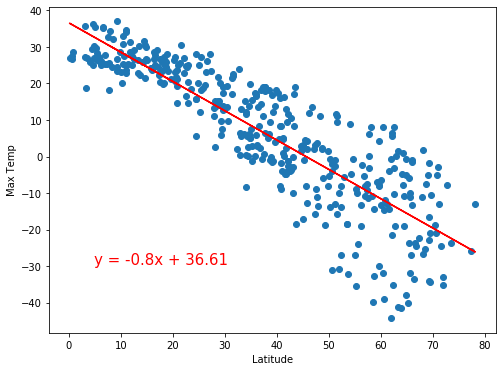

In [73]:
# Linear regression on Northern Hemisphere

regression_plot(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

R squared: 0.3940319068038933


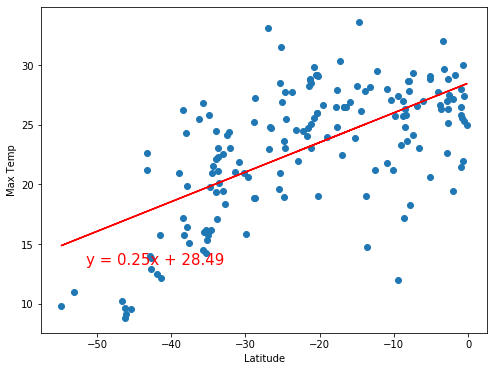

Discussion about the linear relationship: In the northern hemisphere data, the max temperature decreases as the latitude increases (gets further from equator). These factors show a negative correlation. 
The linear model predicts about 75% of the data variance. 

In the southern hemisphere data, the max temperature increases as the latitude increases (gets closer to the equator). These factors show a positive correlation. 
The linear model predicts about 39% of the data variance.


In [81]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

print("\033[1mDiscussion about the linear relationship:\033[0m In the northern hemisphere data, the max temperature decreases as the latitude increases (gets further from equator). These factors show a negative correlation. \nThe linear model predicts about 75% of the data variance. \n\nIn the southern hemisphere data, the max temperature increases as the latitude increases (gets closer to the equator). These factors show a positive correlation. \nThe linear model predicts about 39% of the data variance.")


### Humidity vs. Latitude Linear Regression Plot

R squared: 0.19323419777348125


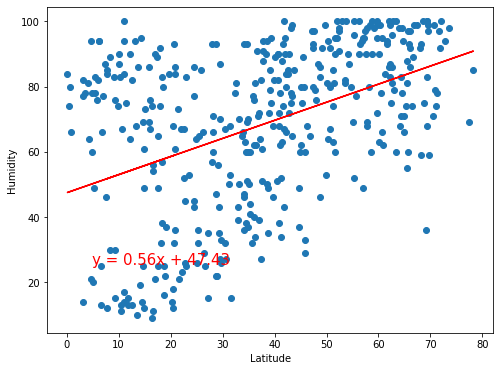

In [76]:
# Northern Hemisphere
regression_plot(northern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")

R squared: 0.01957486940461916


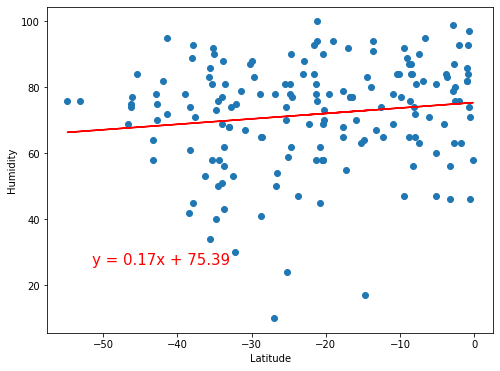

Discussion about the linear relationship: In the northern hemisphere data, the humidity increases as the latitude increases (gets further from equator). These factors show a positive correlation. 
The linear model predicts about 19% of the data variance. 

In the southern hemisphere data, the humidity increases slightly as the latitude increases (gets closer to the equator). These factors show a weak correlation. 
The linear model predicts about 2% of the data variance.


In [80]:
# Southern Hemisphere
regression_plot(southern_hemi_df, "Lat", "Humidity", "Latitude", "Humidity")

print("\033[1mDiscussion about the linear relationship:\033[0m In the northern hemisphere data, the humidity increases as the latitude increases (gets further from equator). These factors show a positive correlation. \nThe linear model predicts about 19% of the data variance. \n\nIn the southern hemisphere data, the humidity increases slightly as the latitude increases (gets closer to the equator). These factors show a weak correlation. \nThe linear model predicts about 2% of the data variance.")



### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.040321578776241096


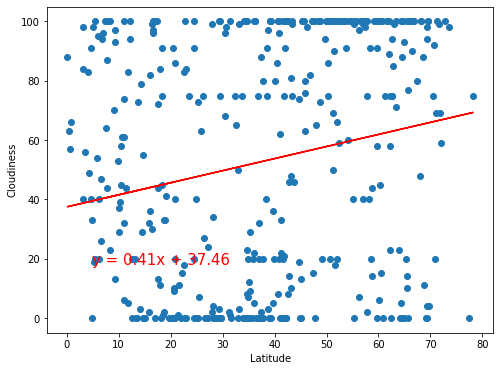

In [82]:
# Northern Hemisphere
regression_plot(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")

R squared: 0.059506918852285325


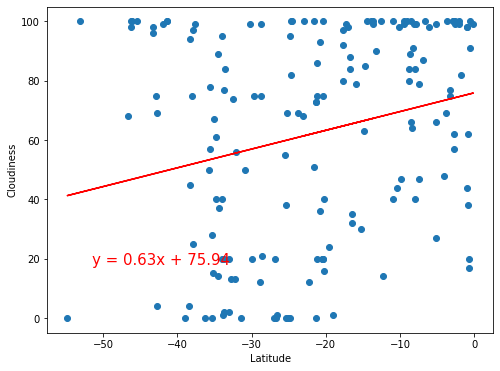

Discussion about the linear relationship: In the northern hemisphere data, the cloudiness increases as the latitude increases (gets further from equator). These factors show a positive correlation. 
The linear model predicts about 4% of the data variance. 

In the southern hemisphere data, the cloudiness increases as the latitude increases (gets closer to the equator). These factors show a positive correlation. 
The linear model predicts about 6% of the data variance.


In [84]:
# Southern Hemisphere
regression_plot(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Cloudiness")

print("\033[1mDiscussion about the linear relationship:\033[0m In the northern hemisphere data, the cloudiness increases as the latitude increases (gets further from equator). These factors show a positive correlation. \nThe linear model predicts about 4% of the data variance. \n\nIn the southern hemisphere data, the cloudiness increases as the latitude increases (gets closer to the equator). These factors show a positive correlation. \nThe linear model predicts about 6% of the data variance.")

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.012255757605137007


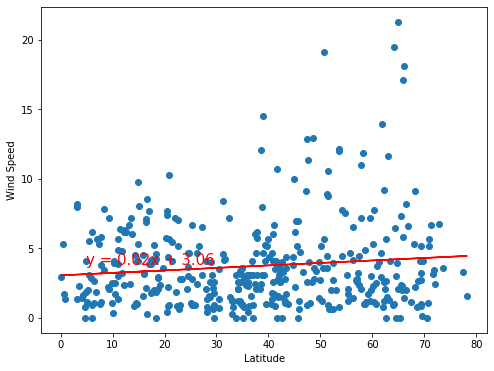

In [85]:
# Northern Hemisphere
regression_plot(northern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")

R squared: 0.04862630609411469


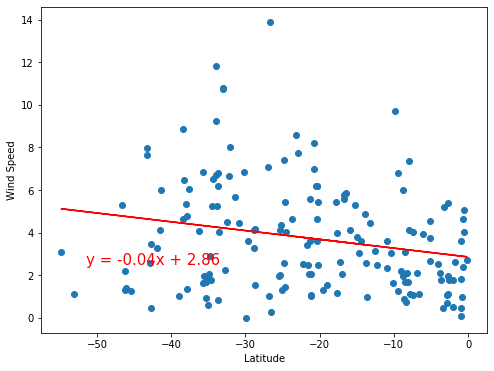

Discussion about the linear relationship: In the northern hemisphere data, the wind speed increases slightly as the latitude increases (gets further from equator). These factors show a weak correlation. 
The linear model predicts about 1% of the data variance. 

In the southern hemisphere data, the wind speed decreases as the latitude increases (gets closer to the equator). These factors show a negative correlation. 
The linear model predicts about 5% of the data variance.


In [87]:
# Southern Hemisphere
regression_plot(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Wind Speed")

print("\033[1mDiscussion about the linear relationship:\033[0m In the northern hemisphere data, the wind speed increases slightly as the latitude increases (gets further from equator). These factors show a weak correlation. \nThe linear model predicts about 1% of the data variance. \n\nIn the southern hemisphere data, the wind speed decreases as the latitude increases (gets closer to the equator). These factors show a negative correlation. \nThe linear model predicts about 5% of the data variance.")